In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smiling-or-not-face-data/smile/Tubby_Smith_0003.jpg
/kaggle/input/smiling-or-not-face-data/smile/Rebecca_Romijn-Stamos_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Martin_Scorsese_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Pierre_Png_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Tom_Rouen_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Jason_Sehorn_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Jennifer_Rodriguez_0002.jpg
/kaggle/input/smiling-or-not-face-data/smile/Ray_Romano_0002.jpg
/kaggle/input/smiling-or-not-face-data/smile/King_Abdullah_II_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Peri_Gilpin_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Shingo_Suetsugu_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Jane_Walker_Wood_0001.jpg
/kaggle/input/smiling-or-not-face-data/smile/Joe_Nichols_0003.jpg
/kaggle/input/smiling-or-not-face-data/smile/Katie_Couric_0001.jpg
/kaggle/input/smiling-or-not-face-data/smil

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [3]:
train_data_set = tf.keras.utils.image_dataset_from_directory(directory='/kaggle/input/smiling-or-not-face-data',
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            image_size=(28,28))

Found 13233 files belonging to 3 classes.


2022-09-29 09:21:57.873066: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
train_data_set.class_names

['non_smile', 'smile', 'test']

In [5]:
non_smile_path_src = '/kaggle/input/smiling-or-not-face-data/non_smile'
smile_path_src = '/kaggle/input/smiling-or-not-face-data/smile'
test = '/kaggle/input/smiling-or-not-face-data/test'

Copy the datasets into working directory in kaggle

In [6]:
shutil.copytree(non_smile_path_src, 'train_images/non_smile')

'train_images/non_smile'

In [7]:
shutil.copytree(smile_path_src, 'train_images/smile')

'train_images/smile'

In [8]:
shutil.copytree(test, 'test_samples/test_imgs')

'test_samples/test_imgs'

In [9]:
train_data_set = tf.keras.utils.image_dataset_from_directory(directory = './train_images',
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            image_size=(28,28))



Found 1203 files belonging to 2 classes.


In [10]:
class_names = train_data_set.class_names
print(class_names)

['non_smile', 'smile']


Plot few images to check

<TakeDataset shapes: ((None, 28, 28, 3), (None, 2)), types: (tf.float32, tf.float32)>


2022-09-29 09:22:35.266897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


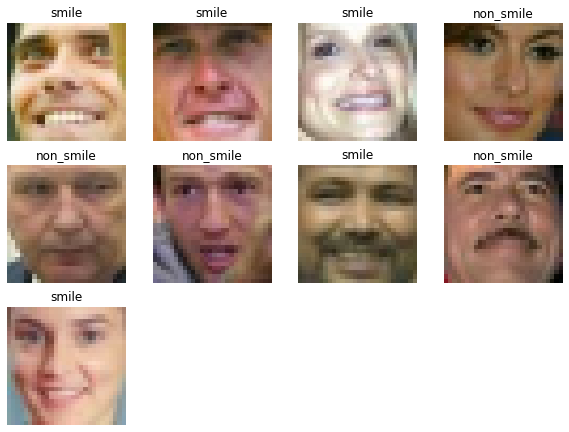

In [11]:
plt.figure(figsize=(10, 10))
print(train_data_set.take(1))
for images, labels in train_data_set.take(1):
    for i in range(9):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

Model building

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',  input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [15]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [16]:
history = model.fit(train_data_set, batch_size=32, epochs=10, 
                   shuffle=True)

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.1245 - accuracy: 0.5486
Epoch 2/10
38/38 [==============================] - 1s 14ms/step - loss: 0.4033 - accuracy: 0.8271
Epoch 3/10
38/38 [==============================] - 1s 14ms/step - loss: 0.2829 - accuracy: 0.8853
Epoch 4/10
38/38 [==============================] - 1s 13ms/step - loss: 0.2425 - accuracy: 0.9002
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1758 - accuracy: 0.9318
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1400 - accuracy: 0.9510
Epoch 7/10
38/38 [==============================] - 1s 13ms/step - loss: 0.1228 - accuracy: 0.9576
Epoch 8/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1261 - accuracy: 0.9534
Epoch 9/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0924 - accuracy: 0.9684
Epoch 10/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0839 - accuracy: 0.9659


Plot of Loss vs epochs

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss V/S epochs')

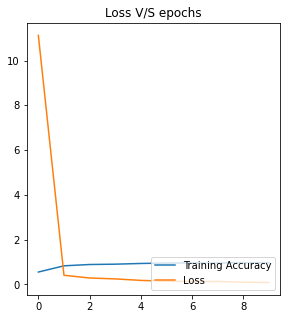

In [18]:
acc = history.history['accuracy'] 

loss = history.history['loss']


epochs_range = range(10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Loss V/S epochs')


In [19]:
test_data = tf.keras.utils.image_dataset_from_directory('./test_samples',
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        image_size=(28,28))

Found 12030 files belonging to 1 classes.


In [20]:
class_names_test = test_data.class_names
print(class_names_test)

['test_imgs']


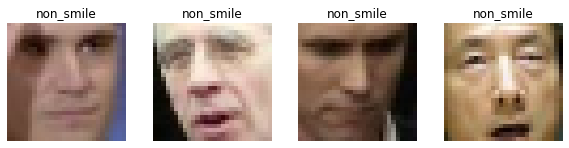

In [21]:
plt.figure(figsize=(10, 10))
# print(train_data_set.take(1))
for images, labels in test_data.take(1):
    for i in range(4):
        sample = images[i]
        sample = sample[np.newaxis,...]
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(model.predict(sample))])
        plt.axis("off")